In [69]:
!pip install mplfinance

This contains daily stock price data for  "INFY.NS" (Infosys) from YFinance,from 1 Jan 2023 to 1 Jan 2024

use yfinance library to fetch unadjusted daily OHLCV data.

In [79]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import mplfinance as mpf

end_date = datetime(year=2024, month=1, day=1)
start_date = datetime(year=2023, month=1, day=1)


ticker = "INFY.NS"


df_single = yf.download(
    tickers=ticker,
    start=start_date,
    end=end_date,
    interval="1d",
    auto_adjust=False,
    progress=False
)

df_single.columns = df_single.columns.get_level_values(0)

print(df_single)



Price         Adj Close        Close         High          Low         Open  \
Date                                                                          
2023-01-02  1439.380249  1524.000000  1526.500000  1504.050049  1514.000000   
2023-01-03  1438.010620  1522.550049  1532.650024  1515.099976  1519.849976   
2023-01-04  1411.801514  1494.800049  1521.000000  1491.099976  1521.000000   
2023-01-05  1393.289673  1475.199951  1505.900024  1469.250000  1505.900024   
2023-01-06  1368.072388  1448.500000  1475.000000  1446.500000  1470.000000   
...                 ...          ...          ...          ...          ...   
2023-12-22  1515.323730  1562.900024  1566.000000  1523.000000  1534.949951   
2023-12-26  1496.950562  1543.949951  1548.000000  1523.000000  1535.000000   
2023-12-27  1519.395874  1567.099976  1570.000000  1544.000000  1544.000000   
2023-12-28  1515.081299  1562.650024  1568.949951  1555.000000  1568.949951   
2023-12-29  1495.932617  1542.900024  1559.449951  1

it calculates the daily percentage change in the closing price in a new column called "pct_change" and marks dates where the absolute daily price change exceeds 5% for  significant jump.

In [71]:
df_single.index = df_single.index.tz_localize(None)
df_single["pct_change"] = df_single["Close"].pct_change()
jump_dates = df_single.index[abs(df_single["pct_change"]) > 0.05].to_pydatetime().tolist()



to Clean and for handling missing data{Nan values}

In [72]:
df_single.dropna(subset=["Open", "High", "Low", "Close", "Volume"], inplace=True)

to define gaps and updating dates for gap > 5%

In [73]:
df_single["prev_close"] = df_single["Close"].shift(1)
df_single["gap"] = abs(df_single["Open"] - df_single["prev_close"]) / df_single["prev_close"]

gap_dates = df_single.index[df_single["gap"] > 0.05].to_pydatetime().tolist()

Mixing dates and gaps to draw vertical lines in graph

In [89]:
all_vlines = jump_dates + gap_dates
all_colors = ['red'] * len(jump_dates) + ['blue'] * len(gap_dates)

vlines_dict = dict(
    vlines=all_vlines,
    linewidths=1.2,
    colors=all_colors,
    alpha=0.7
)



KeyError: 'pct_change'

fianlly ploting

(<Figure size 1600x900 with 4 Axes>,
 [<Axes: ylabel='Price'>,
  <Axes: >,
  <Axes: ylabel='Volume  $10^{6}$'>,
  <Axes: >])

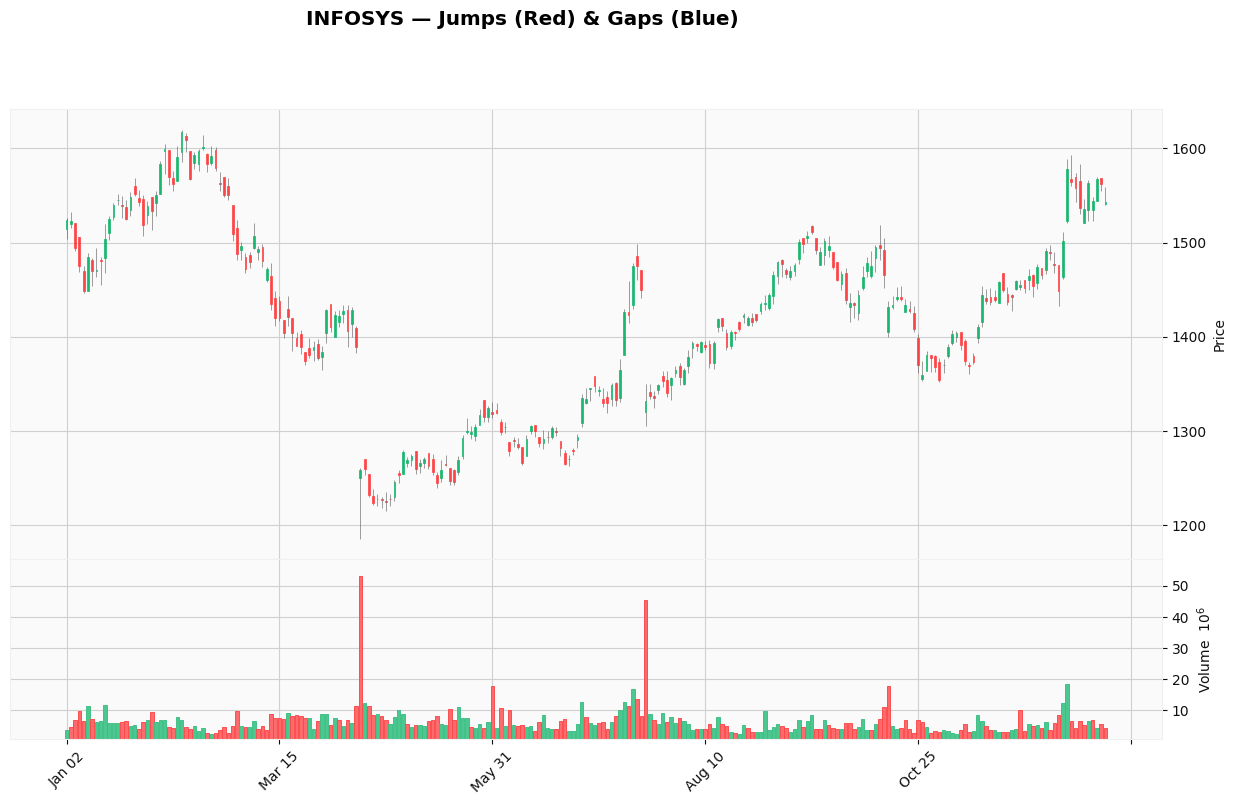

In [90]:

 mpf.plot(df_single,
                      type='candle',
                      volume=True,
                      title="INFOSYS — Jumps (Red) & Gaps (Blue)",
                      style='yahoo',
                      returnfig=True,
                      figsize=(16, 9))





Jumps happens when the stock’s closing price changes sharply compared to the previous day closing price, ex-> a daily day set threshold (e.g., 5%).

Gaps occur when the stock’s opening price differs(ex -> 5%) from the previous day’s closing price.

ex:-

JUMP: July 20, 2023 -> Change: +6.3% -> On this day, Infosys announced better-than-expected Q1 FY24 earnings, that can be most probale reason.

GAP:Date: October 13, 2023-> −5.8% from previous close ->This gap-down could be due to quarterly results announcement.